## AlexNet

- train test가 많이 요동침  -> 데이터 부족
- augmentation을 많이 했음.
- gradcam : 특징을 보여주게 함.


##

### 특징

- hyperparameter tuning을 통해 성능이 2퍼 좋아짐.
- convolution을 거꾸로 해서 원래대로 복원하는 식으로 convolution 특징을 파악 
    -> **convolution을 visualization 함!**
    - 앞에 있는 layer는 간단한 부분이고 뒤로 갈수록 추상화된다.
- stride 2

In [1]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
vgg = tf.keras.applications.VGG16()

553467904/553467096 [==============================] - 54s 0us/step


In [3]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
vgg.get_layer('block1_conv1')

In [5]:
vgg.get_layer('block1_conv1').weights # 가중치 64개 kennel

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
 array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
    

W1007 20:29:11.900037 13320 image.py:717] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


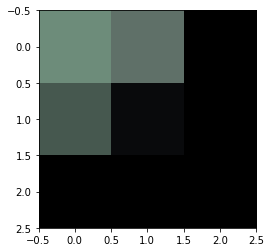

In [7]:
import matplotlib.pyplot as plt
plt.imshow(vgg.get_layer('block1_conv1').weights[0].numpy()[...,0]) # 첫번째 kernel

W1007 20:29:21.097366 13320 image.py:717] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


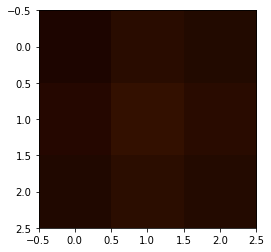

In [8]:
plt.imshow(vgg.get_layer('block1_conv1').weights[0].numpy()[...,1])

In [9]:
import numpy as np
from tensorflow import keras

# The dimensions of our input image
img_width = 180
img_height = 180
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv3_block4_out"

In [10]:
model = keras.applications.ResNet50V2(weights="imagenet", include_top=False)

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)
# 새로운 모델 만들기

94674944/94668760 [==============================] - 12s 0us/step


- stacking하고 global average pooling
-> overfitting 문제를 해결!


### flatten , global average pooling

- flatten : 각 filter를 한줄로 해서 연결
- global : 각 filter에서 하나씩 나옴
- global이 학습 속도가 더 빠름
- fully는 weight를 공유안함.
    - parameter 증가 -> overfitting 가능성 올림
    - global이 공간적 의미를 조금 더 유지시킨다 할 수 있다.
- regualizer -> global이 성능이 안 좋을 수 있어도 일반화적으로는 좋다.(dropout과 비슷)
- global은 dense가 아닌 **convolution에서 직접 결과를 얻는 방법**이라 할 수 있음.

<br></br>

## googlenet
- 보조 classifier 
- filter크기가 1,3,5,7

## Inception
- googlenet 확장


## VGG
- 깔끔하고 단순한 모델임.
- filter 3 * 3
    - filter 크기는 대부분 홀수